In [1]:
%reload_kedro

2025-09-13 21:09:22,806 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2025-09-13 21:09:22,892 - root - INFO - ** Kedro project Inequality Mobility
2025-09-13 21:09:22,893 - root - INFO - Defined global variable `context`, `session` and `catalog`
2025-09-13 21:09:22,913 - root - INFO - Registered line magic `run_viz`


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import shap
import statsmodels.stats.api as sms

from matplotlib import pyplot as plt

In [4]:
df_sample = catalog.load('df_sample')
shap_v_rf = catalog.load('shap_v_rf')
df_region_shap = pd.read_parquet('data/df_region_shap.parquet')
map_class2id = catalog.load('params:modeling.map_class')

2025-09-13 21:09:45,722 - kedro.io.data_catalog - INFO - Loading data from `df_sample` (ParquetDataSet)...
2025-09-13 21:09:45,736 - kedro.io.data_catalog - INFO - Loading data from `shap_v_rf` (PickleDataSet)...
2025-09-13 21:09:45,743 - kedro.io.data_catalog - INFO - Loading data from `params:modeling.map_class` (MemoryDataSet)...


In [15]:
PATH_FIG = 'figs/'

In [34]:
(df_sample[(df_region_shap.groups.astype(int) == 1).values].describe().loc[['mean', 'std']].T).to_excel('data/report_g1.xlsx')
(df_sample[(df_region_shap.groups.astype(int) == 2).values].describe().loc[['mean', 'std']].T).to_excel('data/report_g2.xlsx')

### Feature Importance

In [8]:
def return_main_features(shap_v, modo):
    dict_important = {}
    for fe in shap_v.feature_names:
        dict_important[fe] = abs(shap_v[:,fe, modo].values).mean()
    df = pd.DataFrame(
        dict_important.items(), columns=['features', 'shap_values']
    ).sort_values(by='shap_values', ascending=False)
    return df

df_barplot_final = pd.concat(
    [return_main_features(shap_v_rf, v).rename(columns = {'features': 'features', 'shap_values': f'shap_values_{k}'}) for k, v in map_class2id.items()]
    , axis =1)

df_barplot_final = df_barplot_final.loc[:,~df_barplot_final.columns.duplicated()].copy()
df_barplot_final = df_barplot_final.assign(total=df_barplot_final.iloc[:,1:].sum(axis=1))
df_barplot_final = df_barplot_final.reset_index().drop(columns="index").set_index("features")
df_barplot_final_top = df_barplot_final.sort_values('total').tail(10)

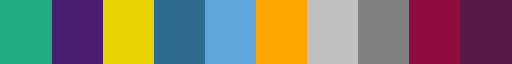

In [9]:
import matplotlib.colors as colors
colors_list = [
    '#25AC82',
    '#481C6E',
    '#E8D202',
    '#2F6B8E',
    '#5DA5DA',
    'orange',
    '#C0C0C0',
    'grey',
    '#900C3F',
    '#581845',

]

cmap = colors.ListedColormap(colors_list)
cmap

In [10]:
map_mode2final = {
    'Automóvel': 'Auto',
    'A pé': 'Walk',
    'Ônibus': 'Bus',
    'Metrô/Trem': 'Metro',
    'Metrô/Trem+Ônibus': 'Bus+Metro',
    'Transporte escolar': 'Scholar Transit',
    'Taxi/Taxi App': 'Taxi',
    'Motocicleta': 'Motorcycle',
    'Outros': 'Others',
    'Bicicleta': 'Bike'
}

dict_map_feature = {
    'loc_origem_count_parada': 'O_count_bus_stop',
    'hora_de_saida': 'departure_time',
    'sexo_Masculino': 'gender_M',
#     'sexo_Feminino': 'gender_F',
#     'sexo_Não respondeu': 'gender_N',
    'loc_origem_dist_metro':'O_dist_metro_st',
    'loc_destino_dist_metro': 'D_dist_metro_st',
    'total_de_viagens_da_pessoa': 'total_trips',
    'idade_em_anos': 'age',
    'per_renda_familiar_mensal': 'income_per_person',
    'per_quantidade_de_automoveis': 'quant_auto_per_person',
    'dist_od': 'dist_od',
    'loc_origem_dist_trem': 'O_dist_train_st',
    'loc_origem_dist_term': 'O_dist_bus_term',
    'loc_origem_dist_ciclo': 'O_dist_bike_lane',
    'per_quantidade_de_motocicletas': 'quant_motor_per_person',
    'per_quantidade_de_bicicletas': 'quant_bike_per_person',
    'motivo_no_destino_Assuntos Pessoais': 'dest_motivation_personalmatter' ,
    'motivo_no_destino_Compras': 'dest_motivation_shop' ,
    'motivo_no_destino_Escola/Educação': 'dest_motivation_school/education' ,
    'motivo_no_destino_Médico/Dentista/Saúde': 'dest_motivation_health' ,
    'motivo_no_destino_Procurar Emprego': 'dest_motivation_lookingforjob' ,
    'motivo_no_destino_Recreação/Visitas/Lazer': 'dest_motivation_leisure' ,
    'motivo_no_destino_Refeição': 'dest_motivation_eating' ,
    'motivo_no_destino_Residência': 'dest_motivation_residence' ,
    'motivo_no_destino_Trabalho Comércio': 'dest_motivation_workservices' ,
    'motivo_no_destino_Trabalho Indústria': 'dest_motivation_workindustry' ,
    'motivo_no_destino_Trabalho Serviços': 'dest_motivation_workcommercial'  
}

In [11]:
df_barplot_final_top

,shap_values_A pé,shap_values_Automóvel,shap_values_Bicicleta,shap_values_Metrô/Trem,shap_values_Metrô/Trem+Ônibus,shap_values_Motocicleta,shap_values_Outros,shap_values_Taxi/Taxi App,shap_values_Transporte escolar,shap_values_Ônibus,total
features,,,,,,,,,,,
hora_de_saida,0.008223,0.008808,0.000938,0.002614,0.004777,0.001444,0.001372,0.003784,0.002873,0.007589,0.042421
sexo_Masculino,0.005888,0.016497,0.003208,0.002030,0.004208,0.009890,0.001186,0.006248,0.001100,0.015769,0.066024
per_quantidade_de_motocicletas,0.006568,0.007653,0.000692,0.002770,0.003603,0.032603,0.000952,0.002648,0.000802,0.009831,0.068122
loc_origem_dist_metro,0.011766,0.022230,0.001327,0.026325,0.009207,0.002129,0.002017,0.006315,0.003480,0.017246,0.102042
loc_destino_dist_metro,0.011059,0.021746,0.001533,0.027799,0.009911,0.002182,0.002359,0.005730,0.003260,0.018318,0.103897
total_de_viagens_da_pessoa,0.022961,0.026954,0.001445,0.003823,0.007784,0.001863,0.001284,0.007051,0.010147,0.021453,0.104766
per_renda_familiar_mensal,0.029417,0.061275,0.002496,0.006746,0.011430,0.003654,0.002670,0.021007,0.006151,0.042013,0.186860
idade_em_anos,0.019772,0.052905,0.002265,0.009718,0.010515,0.006039,0.003346,0.008776,0.057995,0.029596,0.200927
per_quantidade_de_automoveis,0.048206,0.161383,0.005397,0.012628,0.015717,0.004530,0.002475,0.020609,0.004906,0.060343,0.336196


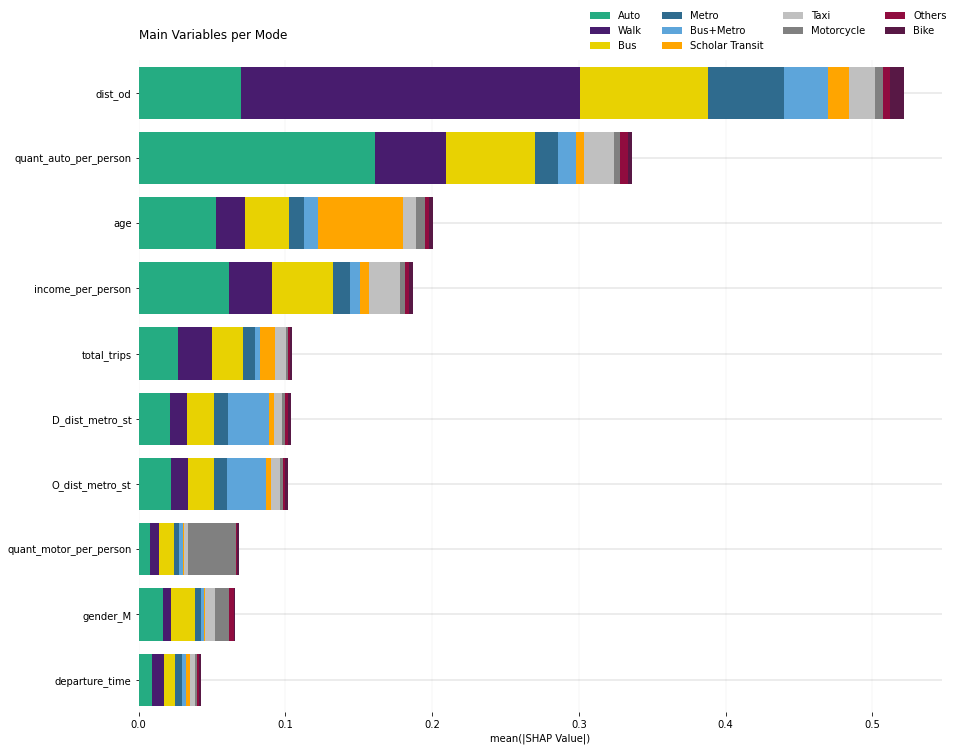

In [16]:
fields = df_barplot_final.sum().sort_values(ascending=False)[1:].index
f = 1.2
fig, ax = plt.subplots(1, figsize=(12*f, 10*f), facecolor='white')

# plot bars
left = len(df_barplot_final_top) * [0]
for idx, name in enumerate(fields):
    plt.barh([dict_map_feature[e] for e in df_barplot_final_top.index], df_barplot_final_top[name], left = left, color=colors_list[idx])
    left = left + df_barplot_final_top[name]

ax.grid(color='grey', linestyle='-', axis='x', linewidth=.1)
ax.grid(color='grey', linestyle='-', axis='y', linewidth=.3)
# fig
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
    

# title, legend, labels
plt.title('Main Variables per Mode\n', loc='left', color='black')
plt.legend(map_mode2final.values(), bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False, labelcolor ='black')

# Labels
ax.set_xlabel('mean(|SHAP Value|)', color='black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.savefig(PATH_FIG + "importance/shapfi-abs",  dpi=300, bbox_inches='tight')

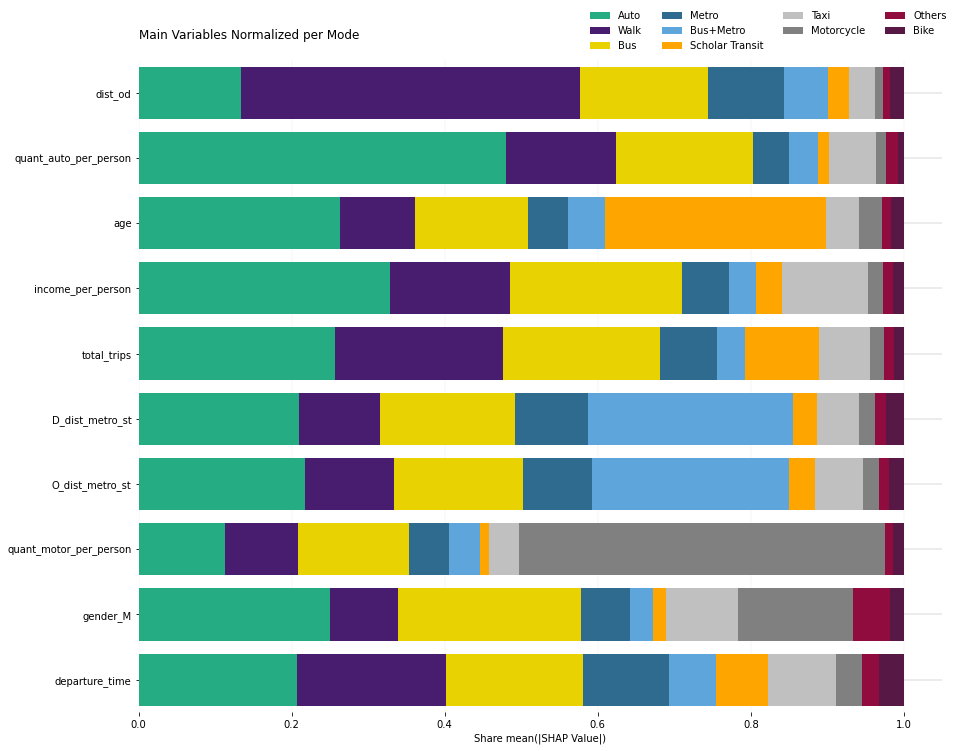

In [17]:
f = 1.2
fig, ax = plt.subplots(1, figsize=(12*f, 10*f), facecolor='white')
# plot bars
left = len(df_barplot_final_top) * [0]
for idx, name in enumerate(fields):
    plt.barh([dict_map_feature[e] for e in df_barplot_final_top.index], df_barplot_final_top[name] / df_barplot_final_top["total"], left = left, color=colors_list[idx])
    left = left + df_barplot_final_top[name] / df_barplot_final_top["total"]

ax.grid(color='grey', linestyle='-', axis='x', linewidth=.1)
ax.grid(color='grey', linestyle='-', axis='y', linewidth=.3)
# fig
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
    

# title, legend, labels
plt.title('Main Variables Normalized per Mode\n', loc='left', color='black')
plt.legend(map_mode2final.values(), bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False, labelcolor ='black')

# Labels
ax.set_xlabel('Share mean(|SHAP Value|)', color='black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.savefig(PATH_FIG + "importance/shapfi-normalized",  dpi=300, bbox_inches='tight')

### Beeswarm Plot

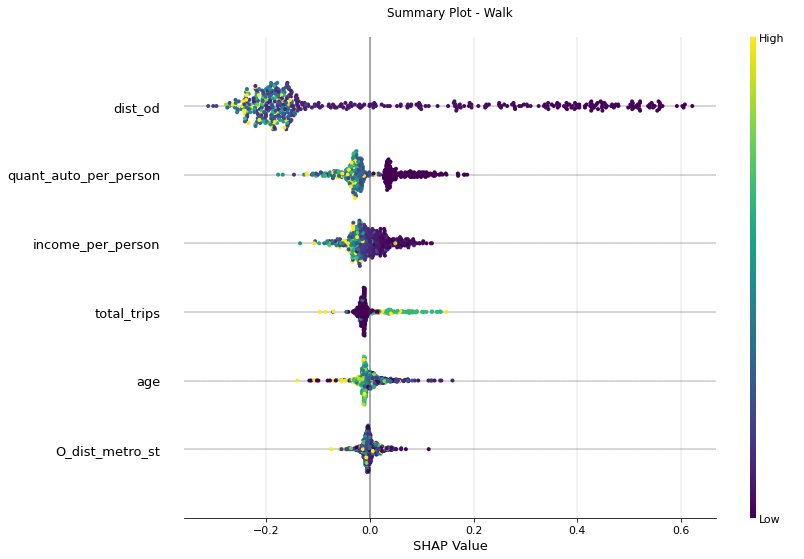

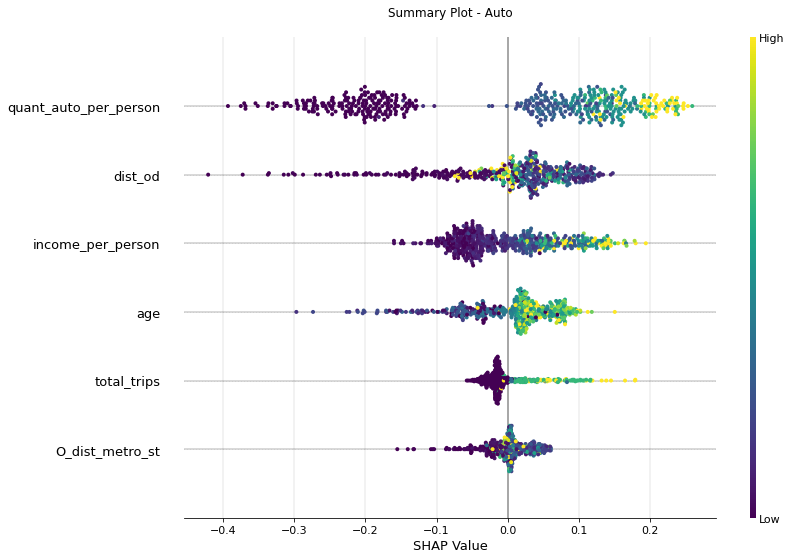

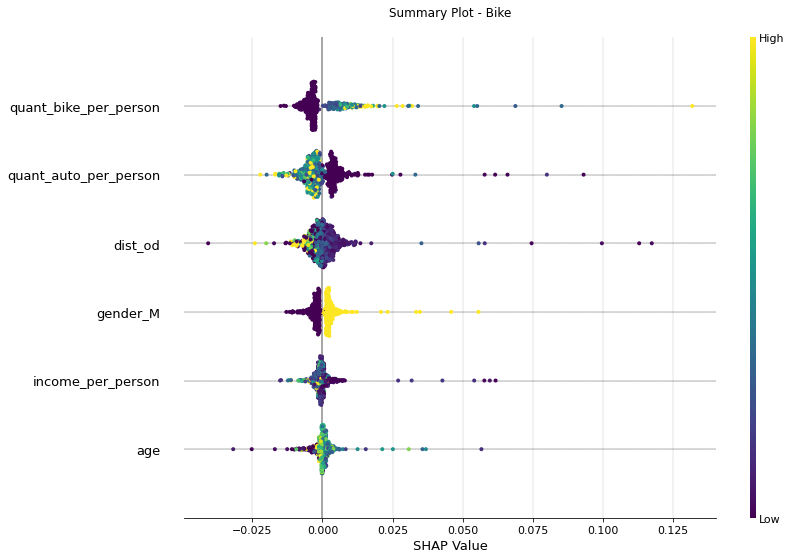

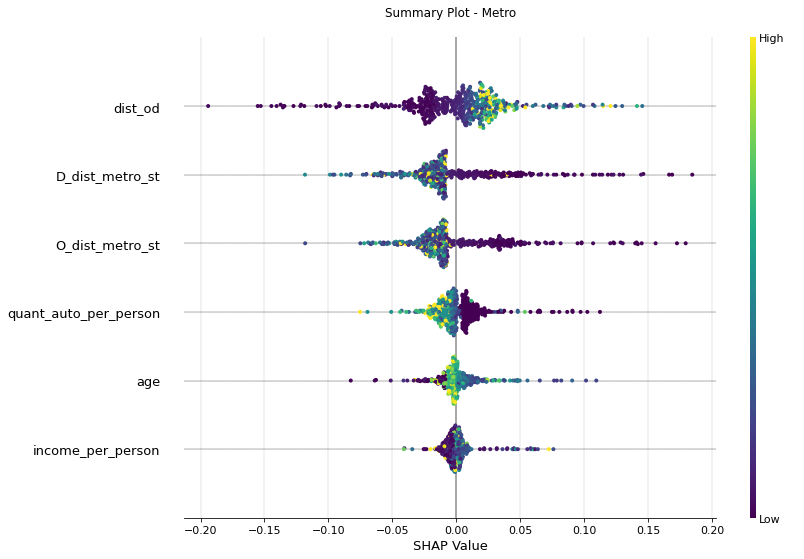

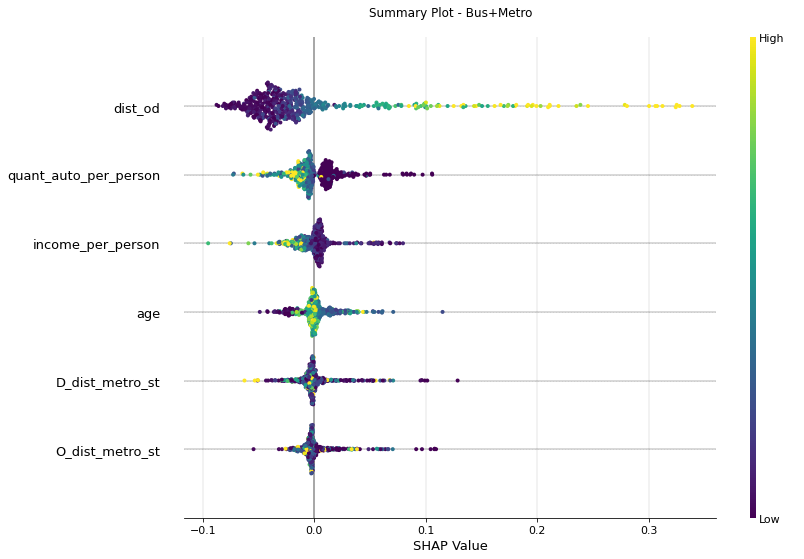

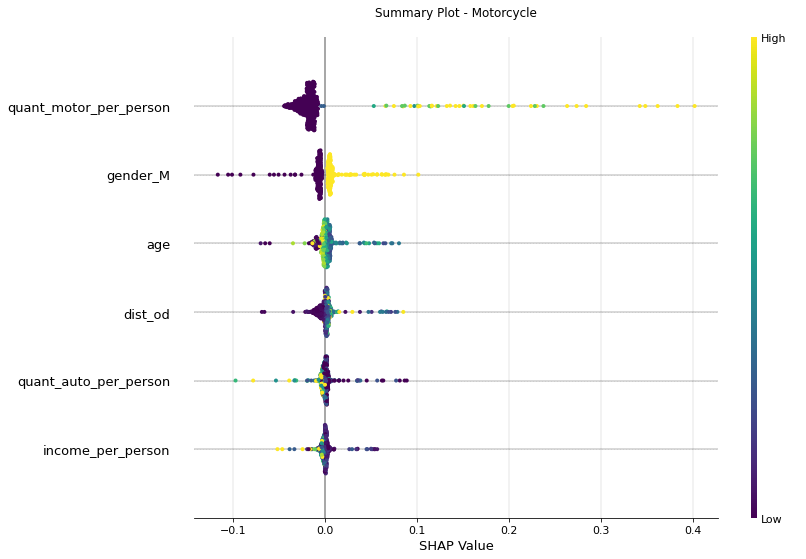

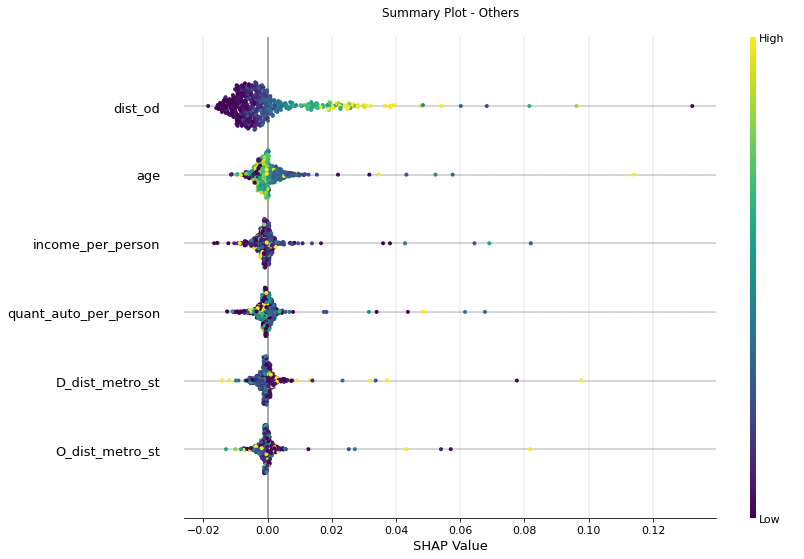

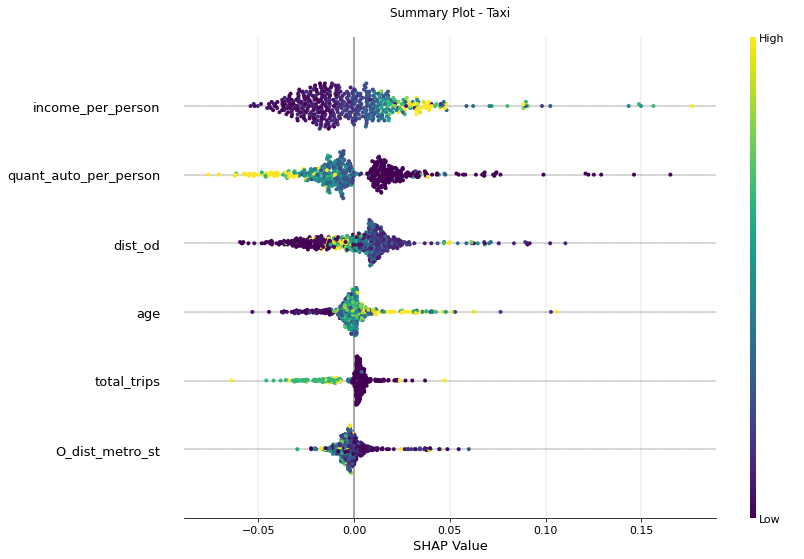

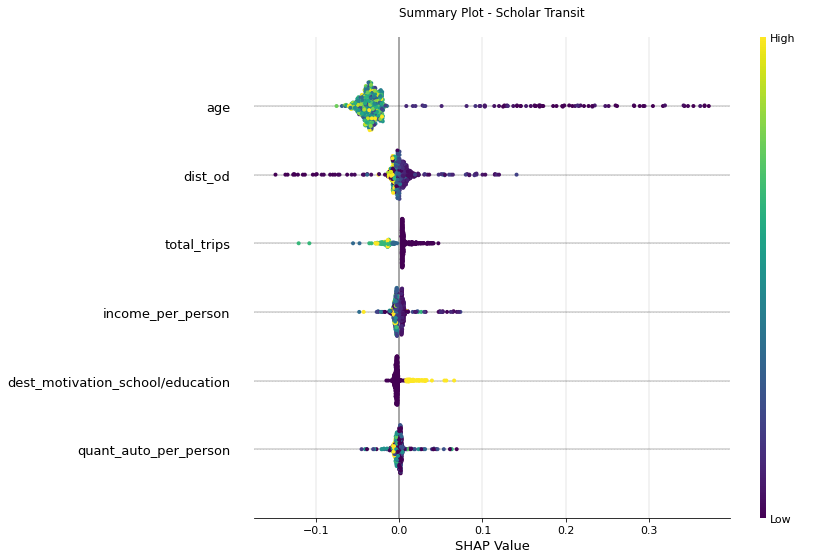

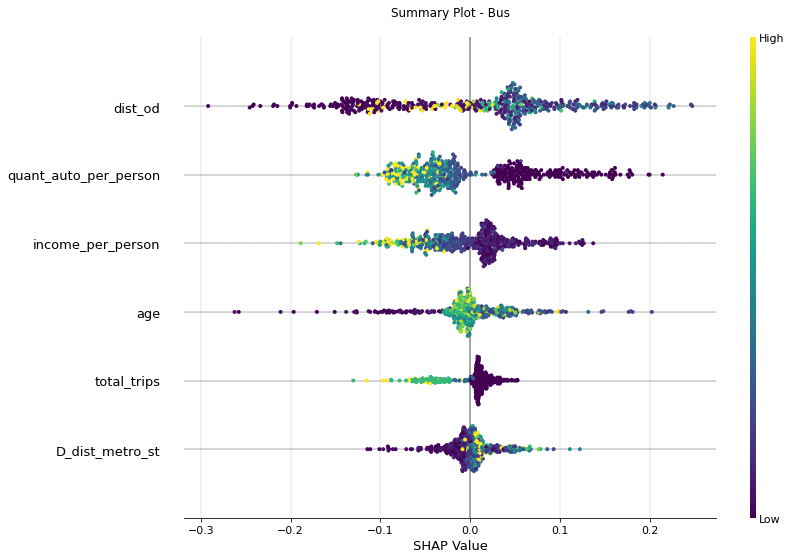

In [18]:
for mod, mod_id in map_class2id.items():
#     print(map_mode2final[mod])
    f = .75
    fig, ax = plt.subplots(1, figsize=(12*f, 10*f), facecolor='white')
    shap.summary_plot(
        shap_v_rf[:,:,mod_id], max_display=6, show=False, cmap='viridis',
        feature_names=[dict_map_feature[e] for e in shap_v_rf.feature_names],
        plot_size = (16*f, 10*f)
    )
    
    cb = fig.axes[1]
    # Change the font color of the colorbar
#     cb.set_title('High', color='black')
#     cb.set_xlabel('Low', color='black')
    
    fig.axes[-1].set_ylabel('Feature Value', color='white')
    
#     ax.set_facecolor('black')
    ax.grid(color='black', linestyle='-', axis='x', linewidth=.1)
    ax.grid(color='black', linestyle='-', axis='y', linewidth=.3)
    # title, legend, labels
    plt.title(f'Summary Plot - {map_mode2final[mod]}\n', color='black')
    ax.set_xlabel(f'SHAP Value', color='black')
    # Labels
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    plt.savefig(PATH_FIG + f"summary/shapbee-{map_mode2final[mod].replace('/', '')}",  dpi=300, bbox_inches='tight')
    plt.show()

### SHAP PDP

In [19]:
in_map_class2id = {v: k for k, v in map_class2id.items()}

In [20]:
df_barplot_final

,shap_values_A pé,shap_values_Automóvel,shap_values_Bicicleta,shap_values_Metrô/Trem,shap_values_Metrô/Trem+Ônibus,shap_values_Motocicleta,shap_values_Outros,shap_values_Taxi/Taxi App,shap_values_Transporte escolar,shap_values_Ônibus,total
features,,,,,,,,,,,
idade_em_anos,0.019772,0.052905,0.002265,0.009718,0.010515,0.006039,0.003346,0.008776,5.799494e-02,0.029596,0.200927
total_de_viagens_da_pessoa,0.022961,0.026954,0.001445,0.003823,0.007784,0.001863,0.001284,0.007051,1.014743e-02,0.021453,0.104766
hora_de_saida,0.008223,0.008808,0.000938,0.002614,0.004777,0.001444,0.001372,0.003784,2.873157e-03,0.007589,0.042421
loc_origem_dist_metro,0.011766,0.022230,0.001327,0.026325,0.009207,0.002129,0.002017,0.006315,3.479505e-03,0.017246,0.102042
loc_origem_dist_trem,0.007429,0.008616,0.001434,0.005499,0.003087,0.001212,0.001372,0.002799,2.818674e-03,0.008056,0.042323
loc_origem_dist_term,0.006317,0.010573,0.001197,0.003646,0.002955,0.001358,0.001306,0.002910,1.999057e-03,0.007513,0.039774
loc_origem_dist_ciclo,0.006881,0.009190,0.001006,0.003808,0.003490,0.001437,0.001186,0.003603,2.267842e-03,0.008594,0.041463
loc_destino_dist_metro,0.011059,0.021746,0.001533,0.027799,0.009911,0.002182,0.002359,0.005730,3.259801e-03,0.018318,0.103897
per_quantidade_de_automoveis,0.048206,0.161383,0.005397,0.012628,0.015717,0.004530,0.002475,0.020609,4.906441e-03,0.060343,0.336196


In [15]:
map_mode2final

{'Automóvel': 'Auto',
 'A pé': 'Walk',
 'Ônibus': 'Bus',
 'Metrô/Trem': 'Metro',
 'Metrô/Trem+Ônibus': 'Bus+Metro',
 'Transporte escolar': 'Scholar Transit',
 'Taxi/Taxi App': 'Taxi',
 'Motocicleta': 'Motorcycle',
 'Outros': 'Others',
 'Bicicleta': 'Bike'}

dist_od
0.84
loc_destino_dist_metro
0.712
loc_origem_dist_metro
0.718
per_quantidade_de_automoveis
1.0
idade_em_anos
1.0
per_renda_familiar_mensal
0.798


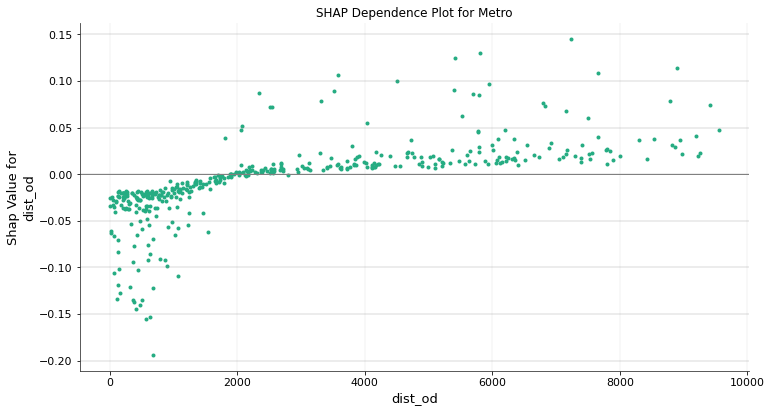

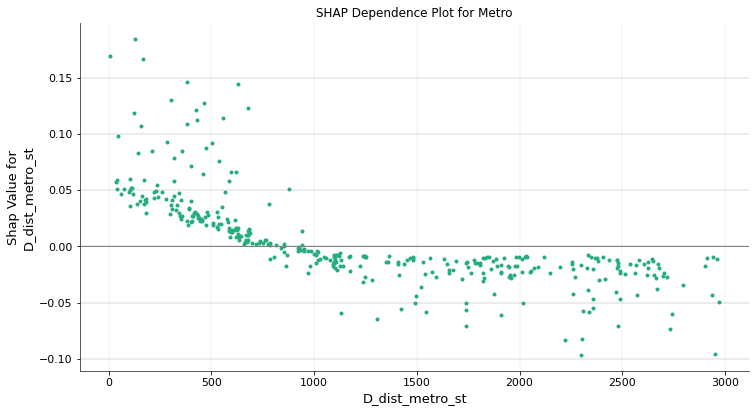

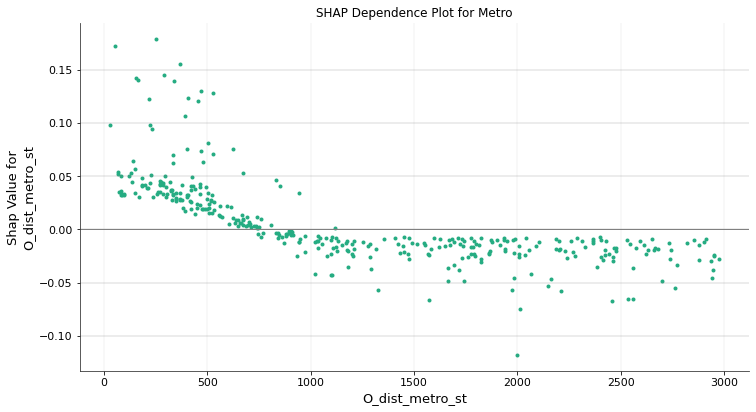

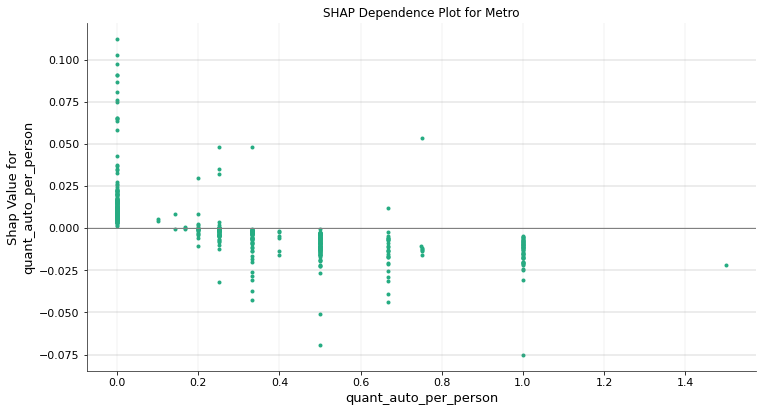

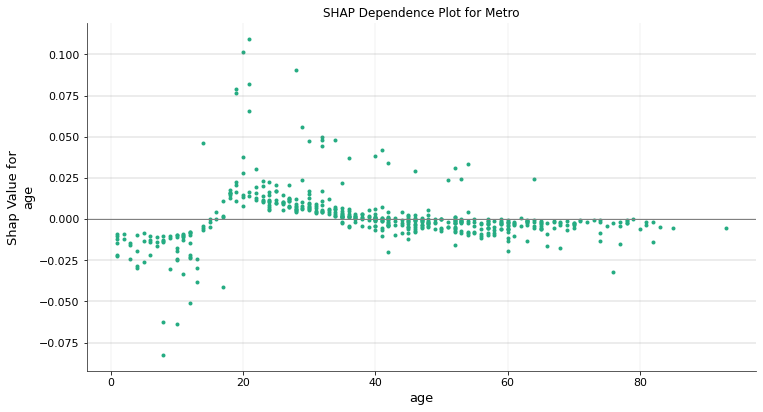

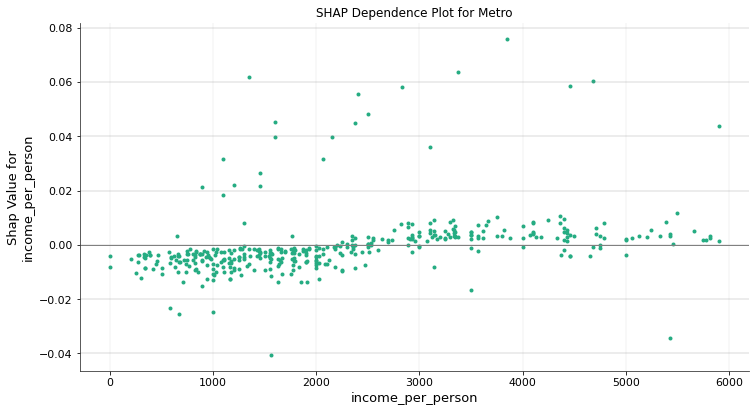

In [21]:
mode_idx = 3
modo = in_map_class2id[mode_idx]

z = 0.8
for c in (df_barplot_final[f"shap_values_{modo}"].sort_values(ascending=False) * 100)[:6].index:
    print(c)
    if 'loc' in c:
        f_v = (df_sample[c] < 3_000).values
    elif 'dist_od' in c:
        f_v = (df_sample[c] < 10_000).values
    elif 'Renda' in c:
        f_v = (df_sample[c] < 6_000).values
    elif 'per_renda_familiar_mensal' in c:
        f_v = (df_sample[c] < 6_000).values
    else:
        f_v = np.full((df_sample.shape[0],), True)
    print(f_v.mean())
    
    # Plot Figure
    fig, ax = plt.subplots(1, figsize=(15 * z, 8 * z), facecolor='white')
#     ax.set_facecolor('black')
    
    shap.plots.scatter(shap_v_rf[f_v, c, mode_idx], ax=ax, color='#25AC82', show=False, hist=False)
    
    # Grid
    ax.grid(color='grey', linestyle='-', axis='x', linewidth=.1)
    ax.grid(color='grey', linestyle='-', axis='y', linewidth=.3)

    # Labels
    variable_name = dict_map_feature[c]
    ax.set_title(f"SHAP Dependence Plot for {map_mode2final[modo]}", color='black')
    ax.set_ylabel(f'Shap Value for\n{variable_name}', color='black')
    ax.set_xlabel(variable_name, color='black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

    # Horizontal line
    plt.axhline(0, color="grey", linestyle="-", linewidth=1)
#     plt.axvline(600, color="grey", linestyle="--", linewidth=.4)

    plt.savefig(PATH_FIG + f"pdp/shappdp-{map_mode2final[modo]}-{variable_name}",  dpi=300, bbox_inches='tight')

### Fairness

In [22]:
def shapv2df(shap_values_raw, modo):
    df_shap = pd.DataFrame(shap_values_raw[:,:,map_class2id[modo]].values, columns=shap_values_raw.feature_names)
    df_shap["pred"] = df_shap[shap_values_raw.feature_names].sum(axis=1)
    return df_shap
    

def shap_dif_in_means_feature(df, col, groups, random=False):
    if random:
        n = df.shape[0]
        v_bools = np.random.choice(a=[False, True], size=n)
        shap_c2_f = df[v_bools][col].values
        shap_c1_f = df[~v_bools][col].values
    else:
        v_bools = (groups - 1).astype(bool)
        shap_c2_f = df[v_bools][col].values
        shap_c1_f = df[~ v_bools][col].values
    cm = sms.CompareMeans(sms.DescrStatsW(shap_c2_f), sms.DescrStatsW(shap_c1_f))
    df = pd.DataFrame(cm.summary().data[1][1:], index=cm.summary().data[0][1:]).T.assign(feature=col)
    df["coef"] = df["coef"].astype(float)
    df["P>|t|"] = df["P>|t|"].astype(float)
    df["[0.025"] = df["[0.025"].astype(float)
    df["0.975]"] = df["0.975]"].astype(float)
    df["t"] = df["t"].astype(float)
    return df

def plot_dif_groups(df_plot, df_global, modo, save=False):
    fig, ax = plt.subplots(figsize=(16, 9), facecolor='black')
    ax.set_facecolor('black')
    
    for lower, upper, c, y in zip(df_plot['[0.025'], df_plot['0.975]'], df_plot['coef'], range(len(df_plot))):
        plt.plot(c, y, 'o', color=colors_list[0], markersize=9)
        plt.plot((lower, upper), (y,y), '--', color="white", alpha=.15)
    y+=1
    ax.plot(df_global["coef"], y, 'o', color=colors_list[2], markersize=9)
    ax.plot((df_global["[0.025"], df_global["0.975]"]), (y,y), '--', color="white", alpha=.15)
    labels = list(df_plot['feature']) + ["Global"]
    plt.yticks(range(len(df_plot)+1), labels)
#     ax.set_yticks(labels)
    ax.axvline(0, color="grey", linestyle="-")
    
    ax.set_xlabel(r'$| E(\phi\mid Central) - E(\phi\mid Peripherical) |$', color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    
    ax.set_title(f"SHAP Geodemographic Disparity for {map_mode2final[modo]}", color='white')
    ax.set_axisbelow(True)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    if save:
        modo_save = modo.replace(' ','_').replace('/','')
#         plt.savefig(f"shap-fairness-{map_mode2final[modo].replace('/', '')}",  dpi=fig.dpi, bbox_inches='tight')
    plt.show()
    
def plot_dif_groups_white(df_plot, df_global, modo, save=False):
    fig, ax = plt.subplots(figsize=(16, 9))

    # Plot individual confidence intervals and coefficients
    for lower, upper, coef, y in zip(df_plot['[0.025'], df_plot['0.975]'], df_plot['coef'], range(len(df_plot))):
        ax.plot((lower, upper), (y, y), linestyle='--', color=colors_list[0], alpha=0.6, linewidth=2)
        ax.plot(coef, y, 'o', color=colors_list[0], markersize=14, markeredgewidth=0)

    # Plot global coefficient
    y += 1
    ax.plot((df_global["[0.025"], df_global["0.975]"]), (y, y), linestyle='--', color=colors_list[1], alpha=0.6, linewidth=2)
    ax.plot(df_global["coef"], y, 'o', color=colors_list[1], markersize=16, markeredgewidth=0)

    # Y-axis labels
    labels = list(df_plot['feature']) + ["Global"]
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels, fontsize=12)

    # X-axis config
    ax.axvline(0, color="grey", linestyle="-", linewidth=1.2)
    ax.set_xlabel(r'$| E(\phi\mid Central) - E(\phi\mid Peripherical) |$', fontsize=14, color='black')
    ax.tick_params(axis='x', colors='black', labelsize=12)
    ax.tick_params(axis='y', colors='black')

    # Title
    ax.set_title(f"SHAP Geodemographic Disparity for {map_mode2final[modo]}", color='black')

    # Grid & layout
    ax.set_axisbelow(True)
    ax.xaxis.grid(True, color='gray', linestyle='dashed', alpha=0.3)
    sns.despine(trim=True)
    plt.savefig(f"{PATH_FIG}parity/geoparity-{map_mode2final[modo]}", dpi=300, bbox_inches='tight')
    plt.tight_layout()
    
def pipe_plot_dif(shap_value, modo, random=False, save=False):
    df_shap = shapv2df(shap_value, modo)
    df_dif_shap = pd.concat([shap_dif_in_means_feature(df_shap, c, df_region_shap.groups, random=random)  for c in shap_value.feature_names])
    df_plot = df_dif_shap.assign(abs_coef = abs(df_dif_shap["coef"].values)).dropna().sort_values("abs_coef").tail(7)
    df_plot['feature'] = df_plot['feature'].map(dict_map_feature)
    df_global = shap_dif_in_means_feature(df_shap, "pred", df_region_shap.groups, random=random)
    plot_dif_groups_white(df_plot, df_global, modo, save)

In [23]:
import seaborn as sns

The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.


In [24]:
map_mode2final

{'Automóvel': 'Auto',
 'A pé': 'Walk',
 'Ônibus': 'Bus',
 'Metrô/Trem': 'Metro',
 'Metrô/Trem+Ônibus': 'Bus+Metro',
 'Transporte escolar': 'Scholar Transit',
 'Taxi/Taxi App': 'Taxi',
 'Motocicleta': 'Motorcycle',
 'Outros': 'Others',
 'Bicicleta': 'Bike'}

In [25]:
modo='Metrô/Trem'

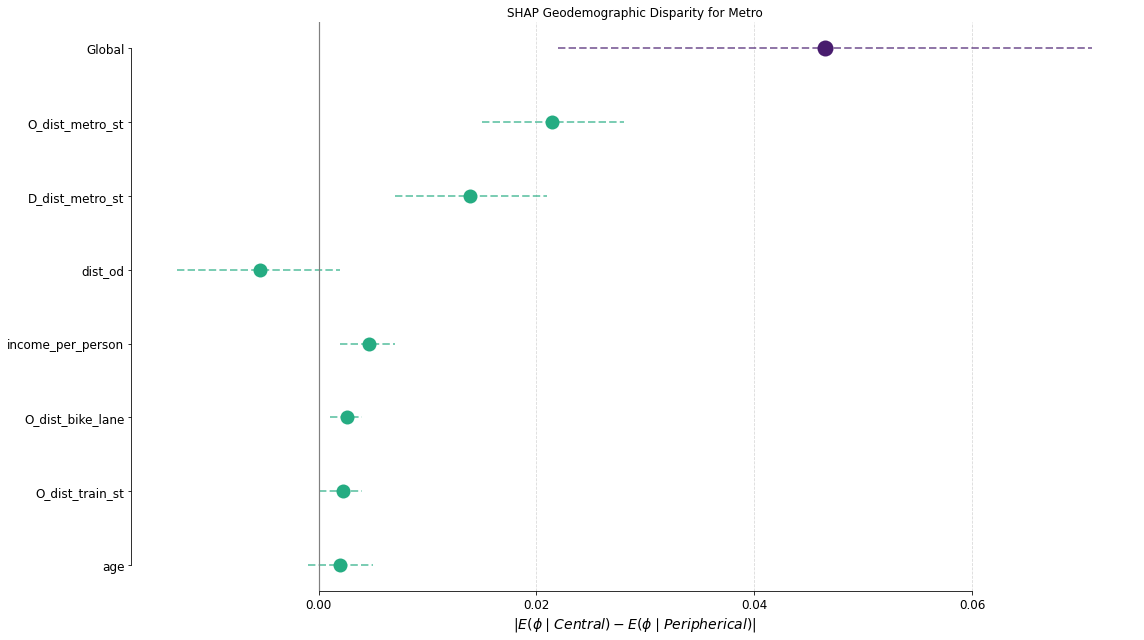

In [32]:
pipe_plot_dif(shap_v_rf, modo, False, True)

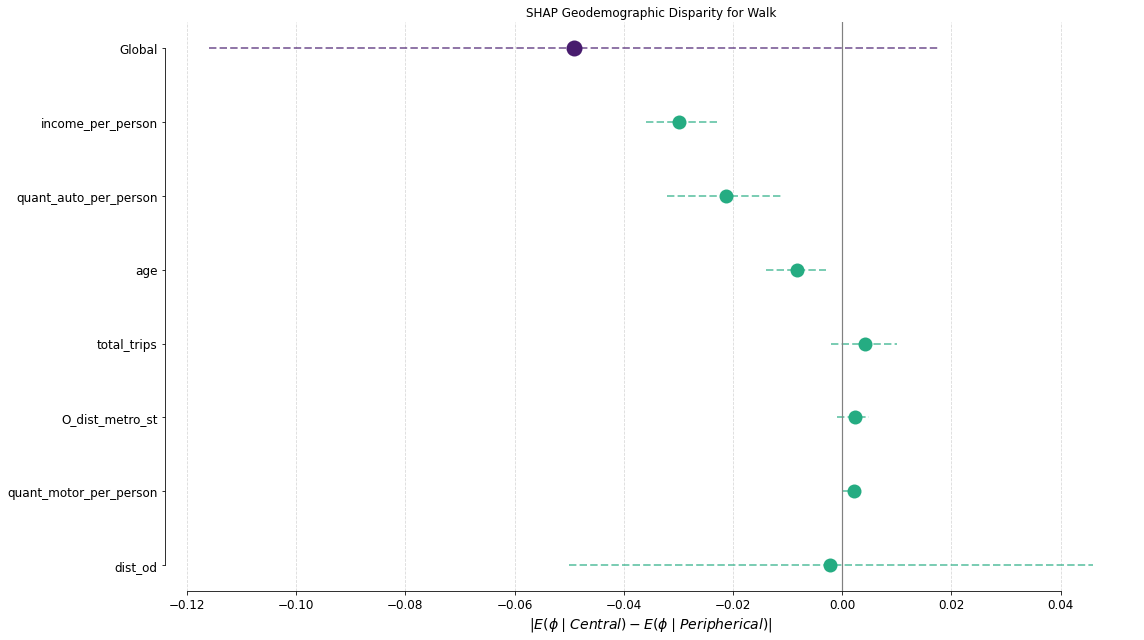

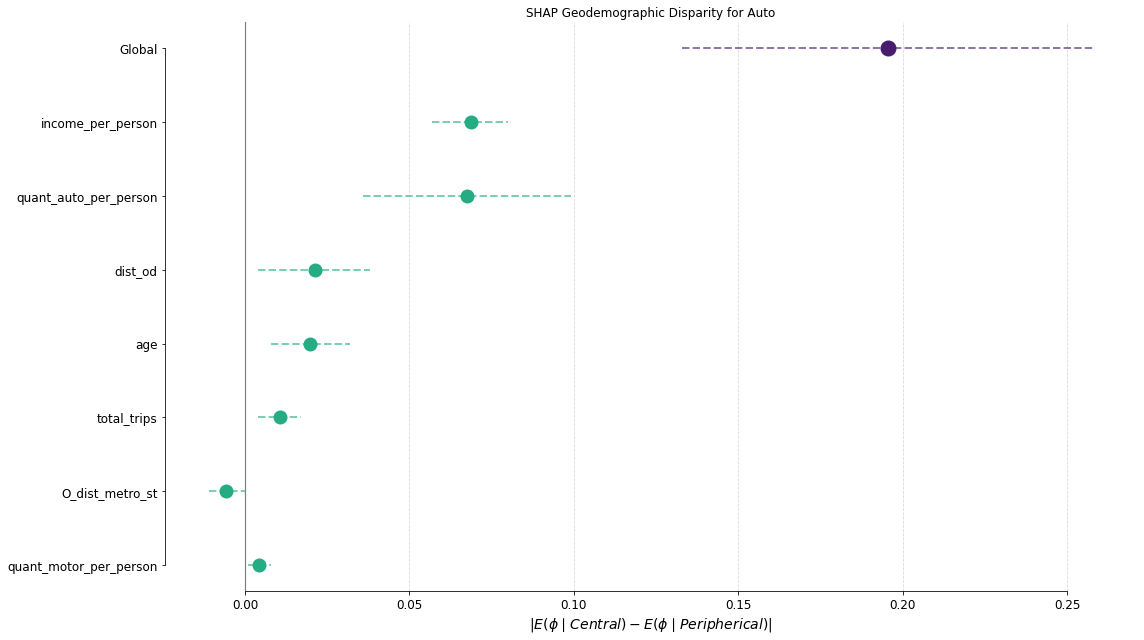

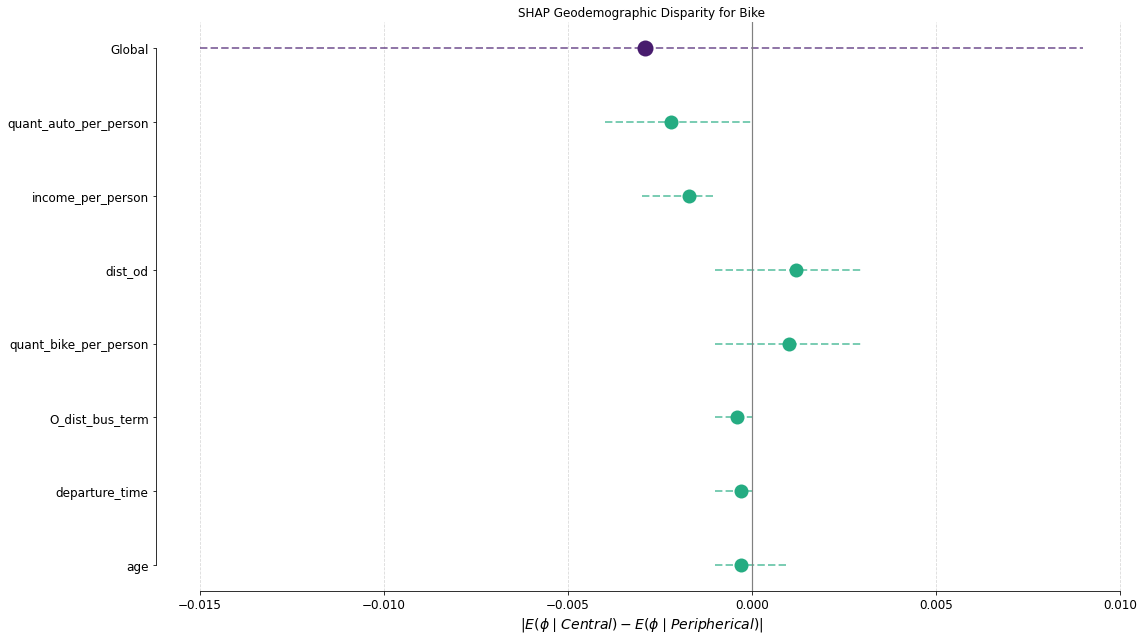

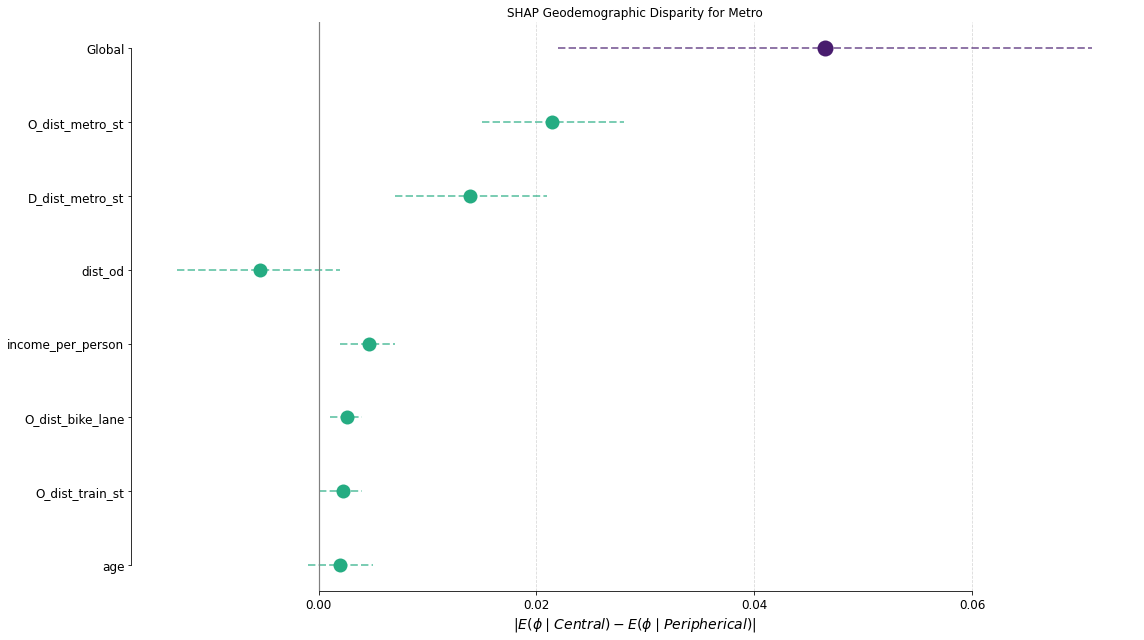

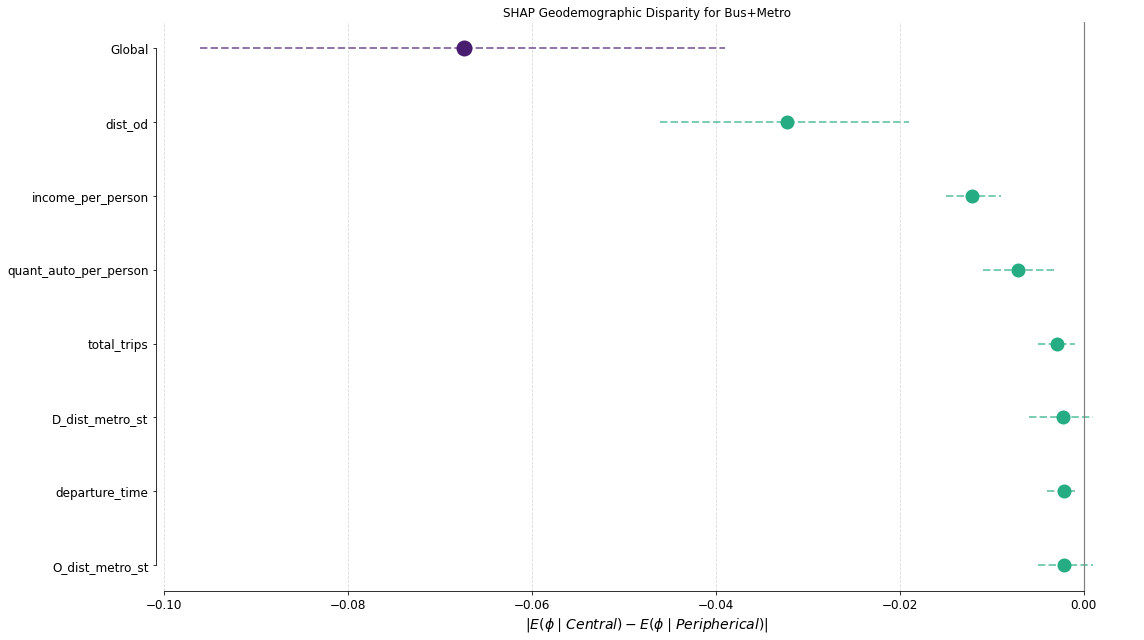

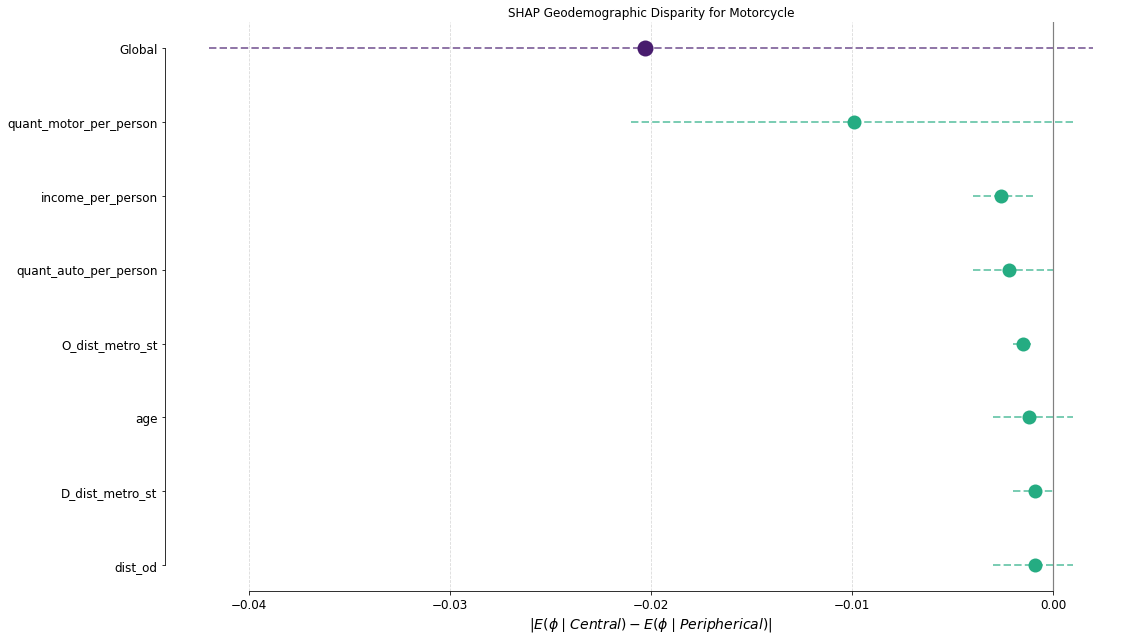

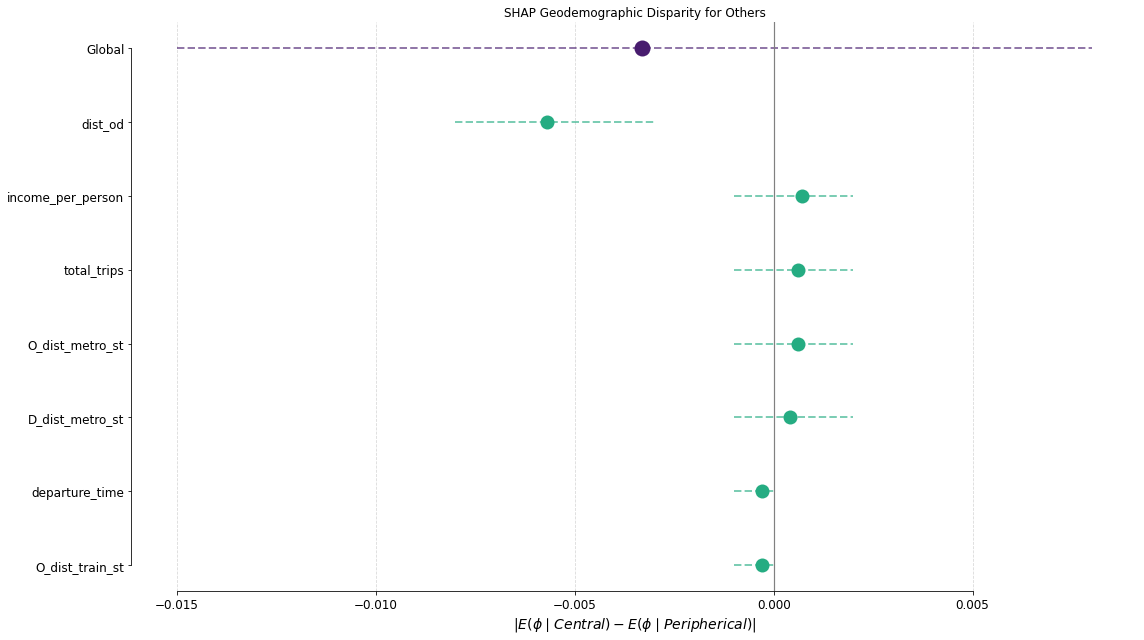

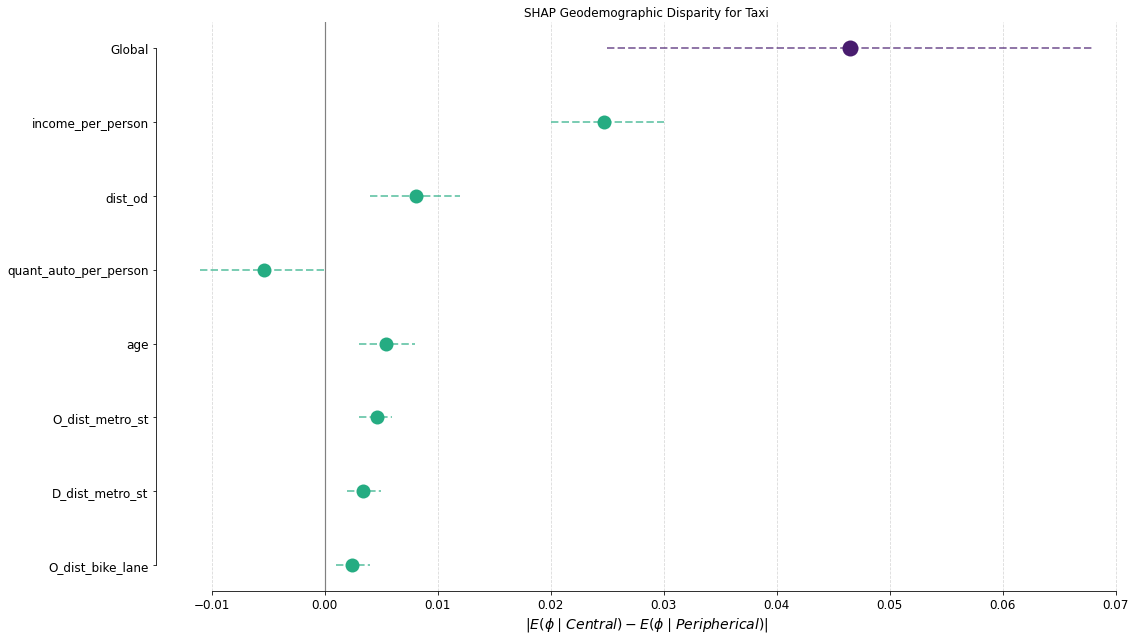

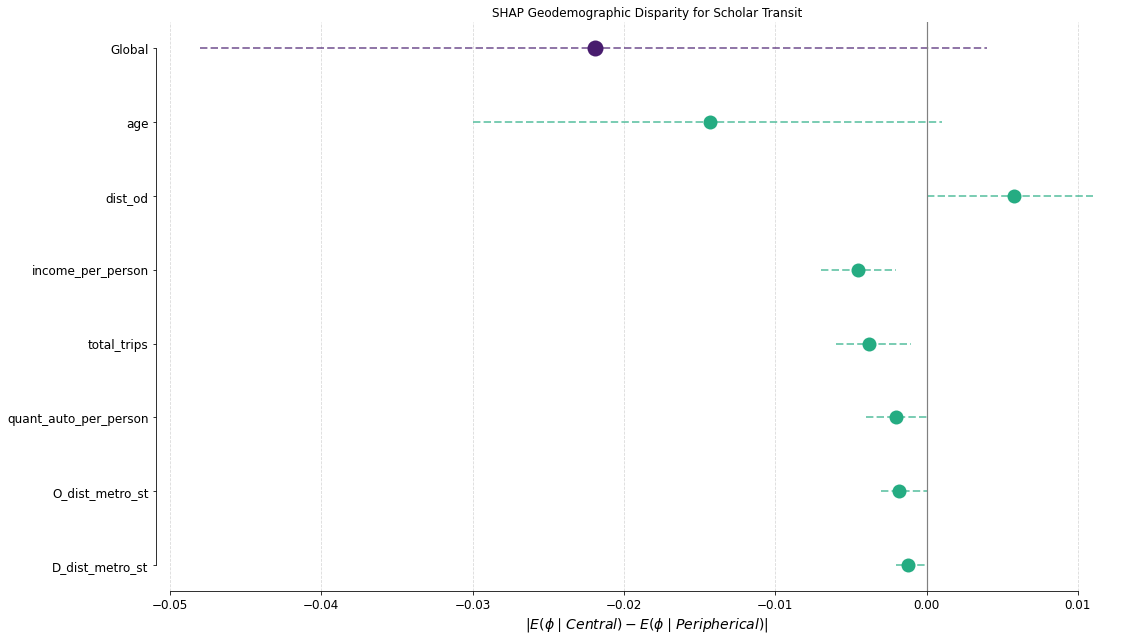

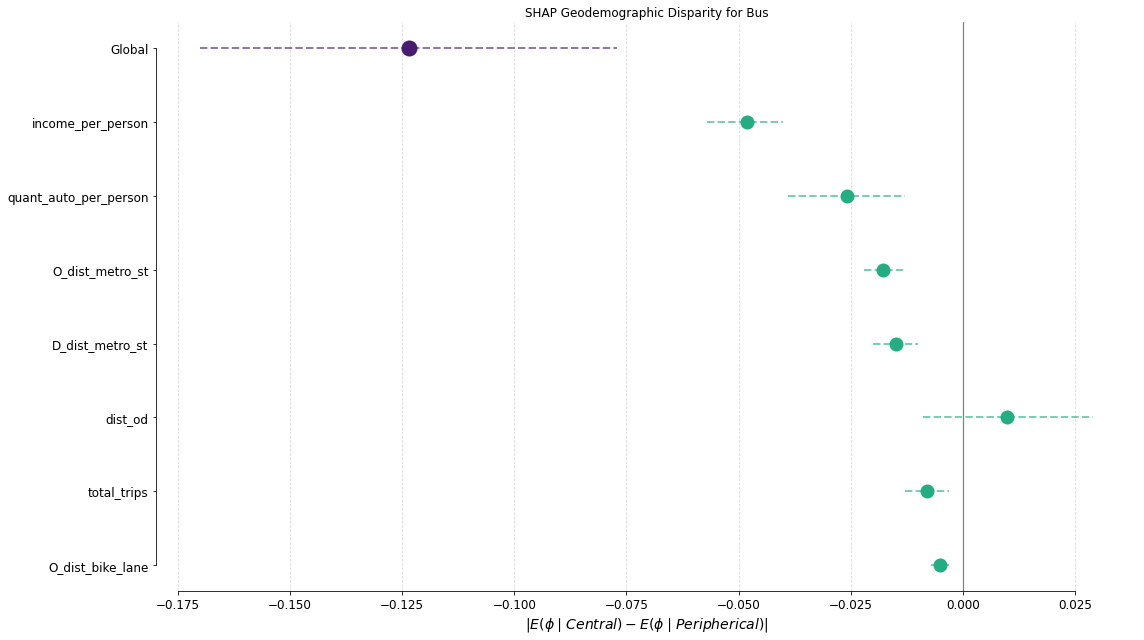

In [27]:
for k, v in map_class2id.items():
    pipe_plot_dif(shap_v_rf, k, False, True)

### table

In [28]:
modo='Metrô/Trem'
df_shap = shapv2df(shap_v_rf, modo)
df_dif_shap = pd.concat([shap_dif_in_means_feature(df_shap, c, df_region_shap.groups)  for c in shap_v_rf.feature_names])
df_plot = df_dif_shap.assign(abs_coef = abs(df_dif_shap["coef"].values)).dropna().sort_values("abs_coef").tail(7)
df_plot['feature'] = df_plot['feature'].map(dict_map_feature)
df_global = shap_dif_in_means_feature(df_shap, "pred", df_region_shap.groups)

In [29]:
df_shap['groups'] = df_region_shap.groups - 1

In [35]:
df_feat = pd.DataFrame(shap_v_rf[:,:,map_class2id[modo]].data, columns=shap_v_rf.feature_names)
df_feat['groups'] = df_region_shap.groups - 1
df_feat_means = df_feat.groupby(['groups']).mean().T
df_feat_means = df_feat_means.reset_index()
df_feat_means.columns = ['feature', 'peripheral', 'central']
df_feat_means

df_shap_means = df_shap.groupby(['groups']).mean().T * 100
df_shap_means = df_shap_means.reset_index()
df_shap_means.columns = ['feature', 'peripheral', 'central']

df_shap_means = pd.merge(
    df_feat_means,
    df_shap_means,
    on='feature',
    suffixes= ('_original', '_shap'),
)

df_shap_means = pd.merge(
    df_shap_means,
    df_dif_shap,
    on='feature'
)
df_shap_means['coef'] = df_shap_means['coef'] * 100
df_shap_means['coef_abs'] = df_shap_means['coef'].abs()
df_shap_means = df_shap_means.sort_values('coef_abs', ascending=False).head(10).round(2)
df_shap_means.to_excel('data/df_shap_means.xlsx')

In [31]:
df_shap_means

,feature,peripheral_original,central_original,peripheral_shap,central_shap,coef,std err,t,P>|t|,[0.025,0.975],coef_abs
3,loc_origem_dist_metro,3480.67,1291.13,-0.94,1.20,2.14,0.003,6.65,0.00,0.02,0.03,2.14
7,loc_destino_dist_metro,3629.58,1468.40,-0.80,0.59,1.39,0.003,3.99,0.00,0.01,0.02,1.39
12,dist_od,5967.48,3422.23,0.20,-0.34,-0.54,0.004,-1.37,0.17,-0.01,0.00,0.54
11,per_renda_familiar_mensal,2827.62,7052.09,-0.16,0.30,0.46,0.001,4.12,0.00,0.00,0.01,0.46
6,loc_origem_dist_ciclo,1777.69,725.40,-0.09,0.17,0.26,0.001,4.38,0.00,0.00,0.00,0.26
4,loc_origem_dist_trem,3124.72,2427.37,-0.12,0.10,0.22,0.001,2.48,0.01,0.00,0.00,0.22
0,idade_em_anos,36.70,44.84,0.01,0.21,0.20,0.002,1.27,0.21,-0.00,0.00,0.20
5,loc_origem_dist_term,2820.63,2451.51,-0.06,0.09,0.15,0.001,2.42,0.02,0.00,0.00,0.15
8,per_quantidade_de_automoveis,0.23,0.43,0.19,0.06,-0.13,0.002,-0.72,0.47,-0.00,0.00,0.13
2,hora_de_saida,12.59,12.86,-0.00,0.11,0.11,0.001,2.12,0.04,0.00,0.00,0.11
